# Prediction Cancellation Booking Hotel

## Problem 

- Setiap hotel memiliki target penjualan setiap bulannya yang telah ditentukan oleh tim management hotel. Target ini dibuat menggunakan budget planning sebagai strategi agar tim management dapat mencapai target yang telah ditentukan. Tim management hotel melakukan budget planning based on revenue setiap priode, revenue yang didapatkan berdasarkan dari jumlah reservasi kamar pada bulan itu. Budget planning tersebut menjadi landasan bagi management hotel untuk merencanakan strategi penjualan hotel agar mencapai target.  Sehingga ketepatan memeperkirakan jumlah reservasi yang cancel booking dapat mempengaruhi keuntungan pada bulan itu.
- Model prediksi cancellation booking hotel ini dapat memberikan impact kepada tim management yaitu bisa memperkirakan budget planning hotel pada bulan itu dan mengetahui customer/reservation mana yang akan cancel, sehingga tim marketing/sales dapat memberikan treatment khusus kepada customer yang diprediksi berpotensi cancel dan tentu saja hal ini dilakukan untuk dapat memaksimalkan revenue hotel.


## Goals 
- Membangun Model Prediction Cancellation Booking Hotel. 
- Memaksimalkan revenue.
- Mengefisiensikan budget planning.


#### ==========================================


## Dataset

https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Acknowledgements

The data is originally from the article https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5 Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

Data source location : Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon

## Data Description:

- hotel : Hotel (Resort Hotel or City Hotel)

- is_canceled : Value indicating if the booking was canceled (1) or not (0)

- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

- arrival_date_year : Year of arrival date

- arrival_date_month : Month of arrival date

- arrival_date_week_number : Week number of year for arrival date

- arrival_date_day_of_month : Day of arrival date

- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- adults : Number of adults

- children : Number of children

- babies : Number of babies

- meal : Type of meal booked. Categories are presented in standard hospitality meal packages:
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner)
    - FB – Full board (breakfast, lunch and dinner)
    
- country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

- market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

- previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

- previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

- reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

- assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

- booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

    - No Deposit – no deposit was made
    - Non Refund - a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay.
- agent : ID of the travel agency that made the booking

- company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

- customer_type : Type of booking, assuming one of four categories:

    - Contract - when the booking has an allotment or other type of contract associated to it
    - Group – when the booking is associated to a group
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
- adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- required_car_parking_spaces : Number of car parking spaces required by the customer

- total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

- reservation_status : Reservation last status, assuming one of three categories:
    - Canceled – booking was canceled by the customer
    - Check-Out – customer has checked in but already departed
    - No-Show – customer did not check-in and did not inform the hotel of the reason why
- reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Common Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

## Import Dataset

In [3]:
df_ori = pd.read_csv('hotel_bookings.csv')
df_ori

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df = df_ori.copy()

## Info and Describe dataset

In [5]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,hotel,object,0,0.00,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[118, 210]"
3,arrival_date_year,int64,0,0.00,3,"[2015, 2017]"
4,arrival_date_month,object,0,0.00,12,"[January, December]"
5,arrival_date_week_number,int64,0,0.00,53,"[15, 4]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[9, 6]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[1, 3]"
8,stays_in_week_nights,int64,0,0.00,35,"[3, 35]"
9,adults,int64,0,0.00,14,"[50, 5]"


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
#mengurutkan bulan
mon=['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=mon,ordered=True)

# Data Preparation

### ***Handling Missing Value***

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

most null:
- Company (90~%)
- Agent (13%)
- Country (5%)

so the company will be deleted, the agent and country will be filled by mode. 

In [10]:
del df['company']

In [11]:
df['agent'].fillna(df['agent'].mode()[0], inplace=True) 

In [12]:
df['country'].fillna(df['country'].mode()[0], inplace=True) 

In [13]:
df['children'].fillna(df['children'].mode()[0], inplace=True) 

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## ***Handling outliers***

<Figure size 1080x720 with 0 Axes>

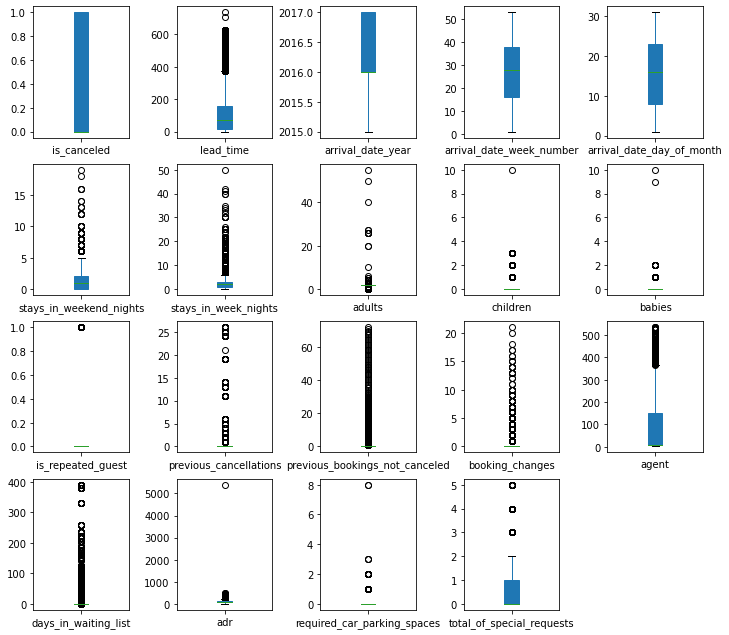

In [15]:
# subplots
plt.figure(figsize=(15,10))
df.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);
plt.show()

what we found from outliers checking:
    - adr < 0 and adr == 0 will be dropped 
    - adr > 1000 will be dropped
    - ppl with no adr and canceled and has no deposit are still counted bcs maybe iseng2
    - adults == 0 or there's no somebody in the room will be dropped, bcs the data is considered as an abnormal

In [16]:
print('Data before drop row:',df.shape[0])

Data before drop row: 119390


In [17]:
df = df[(df['adr'] > 0) & (df['adr'] < 1000)]

In [18]:
df[(df['market_segment']=='Undefined')|(df['distribution_channel']=='Undefined')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,1.0,0,HB,PRT,Direct,Undefined,0,0,0,A,A,0,No Deposit,9.0,0,Transient,112.7,1,2,Check-Out,2015-07-10
40600,City Hotel,1,2,2015,August,32,3,1,0,2,0.0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,0.0,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,0.0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,0.0,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [19]:
df=df[df['market_segment']!='Undefined']

In [20]:
df=df[df['distribution_channel']!='Undefined'] ##jumlah hanya 3

In [21]:
#Melihat tipe 'meal'
df['meal'].value_counts()

BB           90809
HB           14261
SC           10441
Undefined     1131
FB             782
Name: meal, dtype: int64

In [22]:
### Buat Function untuk Recategorize karena undefined dan sc memiliki arti yang sama
def sc_un(i):
    if i == 'Undefined':
        x='SC'
        return x
    else:
        x=i
    return x
df['meal'] = df['meal'].apply(sc_un)

In [23]:
df['meal'].value_counts()

BB    90809
HB    14261
SC    11572
FB      782
Name: meal, dtype: int64

In [24]:
#melihat outliers 'required_car_parking_spaces', apakah data ini abnormal?
df['required_car_parking_spaces'].value_counts()

0    110117
1      7274
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [25]:
#melihat outliers 'total_of_special_requests', apakah data ini abnormal?
df['total_of_special_requests'].value_counts()

0    69139
1    32724
2    12761
3     2436
4      324
5       40
Name: total_of_special_requests, dtype: int64

In [26]:
print('Data after drop row:',df.shape[0])

Data after drop row: 117424


### ***Extract reservation_status_date***

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# extract reservation date
date_dt=df['reservation_status_date'].dt

#ambil bulan berupa nama
df['reservation_month'] = date_dt.month_name()

##ambil data tanggal berupa angka
df['reservation_date'] = date_dt.day

#ambil nama hari
df['reservation_name_day'] = date_dt.day_name()

#ambil jam
df['reservation_year'] = date_dt.year

In [28]:
df.drop(columns='reservation_status_date', inplace=True)

In [29]:
df_clean=df.copy()

In [30]:
df_clean.to_csv('data_clean.csv')

### ***Adding Features***

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_month,reservation_date,reservation_name_day,reservation_year
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,July,2,Thursday,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,July,2,Thursday,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,July,3,Friday,2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,July,3,Friday,2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,9.0,0,Transient,107.0,0,0,Check-Out,July,3,Friday,2015


In [32]:
df['total_days'] = df.stays_in_week_nights + df.stays_in_weekend_nights 

In [33]:
df['total_fare'] = df['adr'] * df['total_days']

In [34]:
df['total_cust']=df['adults']+df['babies']+df['children']

In [35]:
#Menganggap jumlah tamu yang meginap hanya 0 adalah data abnormal
# df=df[df['total_cust']>0]

In [36]:
# create booking date
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(str)
df['arrival_date_year'] = df['arrival_date_year'].astype(str)
df['arrival_date_month']=df['arrival_date_month'].astype(str)

In [37]:
df['booking_date'] = df['arrival_date_year']+'-'+df['arrival_date_month']+'-'+df['arrival_date_day_of_month']
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [38]:
# extract booking date
booking_dt = df['booking_date'].dt
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [39]:
#booking quarter
df['booking_qt'] = booking_dt.to_period('Q')

In [40]:
df['booking_qt'] = df['booking_qt'].astype(str)
df['booking_qt'].dtype

dtype('O')

In [41]:
df['is_weekend'] = df['stays_in_weekend_nights'].apply(lambda x: 1 if x > 0 else 0)
df['is_weekend'].value_counts()

1    66928
0    50496
Name: is_weekend, dtype: int64

In [42]:
# mengubah booking changes menjadi 0 dan 1

def func(row): 
    val=0
    if row['booking_changes'] >= 1 :
        val = 1
    return val
df['change_booking'] = df.apply(func, axis=1)

In [43]:
# mengubah waiting ist menjadi 0 dan 1

def func(row): 
    val=0
    if row['days_in_waiting_list'] >= 1 :
        val = 1
    return val
df['waiting_list'] = df.apply(func, axis=1)

In [44]:
# mengubah previous cancellation menjadi 0 dan 1

def func(row): 
    val=0
    if row['previous_cancellations'] >= 1 :
        val = 1
    return val
df['pre_cancellations'] = df.apply(func, axis=1)

In [45]:
# mengubah kolom child menjadi 0 dan 1
# membuat kolom baru jumlah anak (children + babies)

df['child'] = df['children'] + df['babies']
def func(row): 
    val=0
    if row['child'] >= 1 :
        val = 1
    return val

df['with_child'] = df.apply(func, axis=1)

In [46]:
# mengubah kolom special request menjadi 0 dan 1

def func(row): 
    val=0
    if row['total_of_special_requests'] >= 1 :
        val = 1
    return val
df['special_req'] = df.apply(func, axis=1)

# Business Questions

1. Bagaimana Laporan Hasil Penjualan Kamar 2015-2017
2. Bagaimana karakteristik customer yang berpotensi melakukan cancellation?
3. Apa yang Menghambat anda mencapai sasaran pendapatan (revenue)
    - Bagaimana meminimalisir cancelation..

# Laporan Hasil Penjualan Kamar 2015-2017

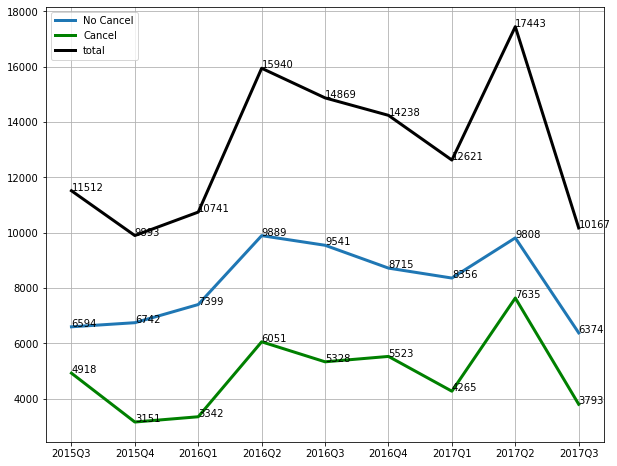

In [47]:
df_c=df[df['is_canceled'] == 0].groupby('booking_qt')['hotel'].count().reset_index(name='counts')
df_n=df[df['is_canceled'] == 1].groupby('booking_qt')['hotel'].count().reset_index(name='counts')
df_sum=df.groupby('booking_qt')['hotel'].count().reset_index(name='counts')

plt.figure(figsize=(10,8))
plt.plot(df_c["booking_qt"],df_c["counts"],label='No Cancel', linewidth=3)
plt.plot(df_n["booking_qt"],df_n["counts"], color = "green",label='Cancel',linewidth=3)
plt.plot(df_sum["booking_qt"],df_sum["counts"], color = "black",label='total',linewidth=3)
plt.legend()
plt.grid(True)
for i in df_c["counts"]:
    ind = list(df_c["counts"]).index(i)
    plt.text(df_c["booking_qt"][ind], i+2, i)
for i in df_n["counts"]:
    ind = list(df_n["counts"]).index(i)
    plt.text(df_n["booking_qt"][ind], i+2, i)
for i in df_sum["counts"]:
    ind = list(df_sum["counts"]).index(i)
    plt.text(df_sum["booking_qt"][ind], i+2, i)
plt.show()


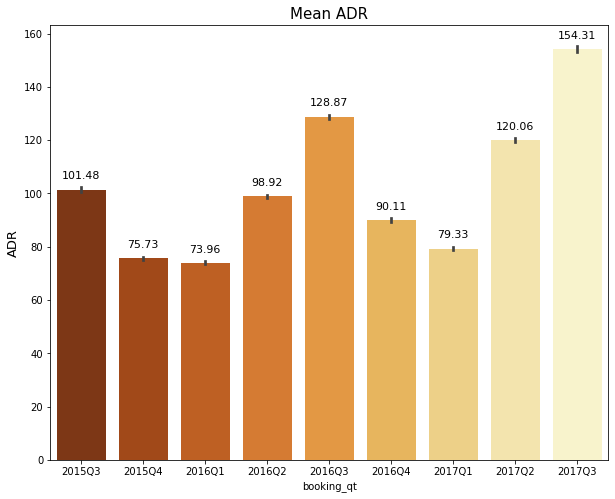

In [48]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x = 'booking_qt', y='adr', palette='YlOrBr_r', data=df)
plt.title("Mean ADR", fontsize=15)
plt.ylabel('ADR',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+2), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
# 1

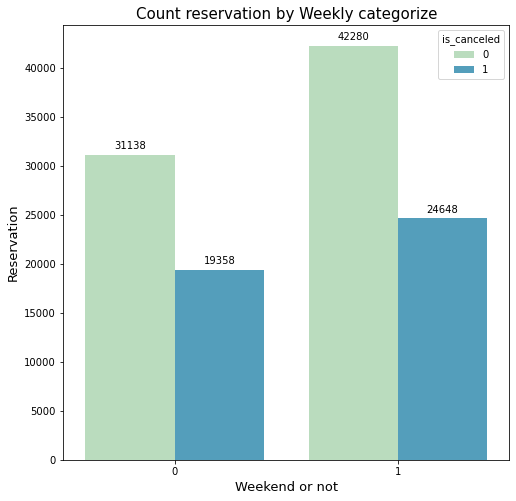

56.54 persen orang memesan kamar disaat weekend dan 37.13 persen dari orang tersebut melakukan cancel


In [49]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(df['is_weekend'], palette = 'GnBu',hue=df['is_canceled'])
plt.title("Count reservation by Weekly categorize", fontsize=15)
plt.ylabel('Reservation',fontsize=13)
plt.xlabel('Weekend or not',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
x=round((66390)/117427*100,2)
y=round((24649)/66390*100,2)
print(x,"persen orang memesan kamar disaat weekend dan",y,'persen dari orang tersebut melakukan cancel')

Jumlah reservation Hotel:  117424


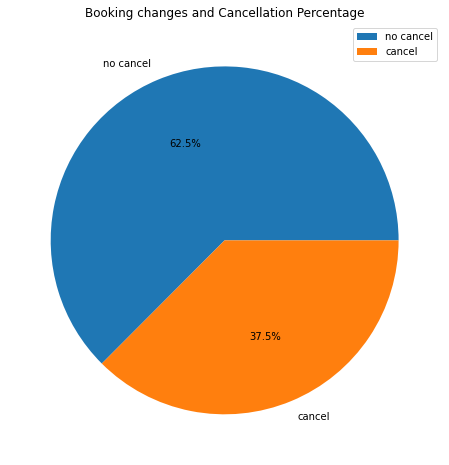

Persentasi yang cancel booking ada 37,48% dari 117427 total booking


In [50]:
print("Jumlah reservation Hotel: ", len(df))
x2 = df['is_canceled'].value_counts()

c=plt.figure(figsize=(8,8))
c.set_facecolor('white')
plt.pie(x2, labels = ['no cancel', 'cancel'], autopct='%1.1f%%')
plt.title("Booking changes and Cancellation Percentage")
plt.legend()
plt.show()
print("Persentasi yang cancel booking ada 37,48% dari 117427 total booking")

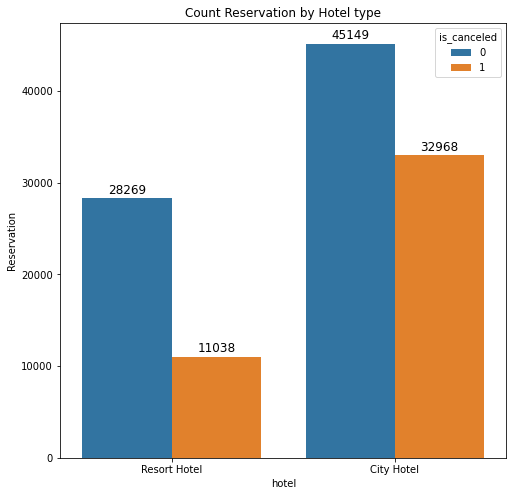

Jumlah reservasi di City Hotel lebih banyak dibanding di Resort hotel, dengan perbedaan sebesar 33.05 persen


In [51]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df['hotel'],hue=df['is_canceled'])
plt.ylabel('Reservation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Count Reservation by Hotel type')
plt.show()

x=round((78119-39308)/117427*100,2)
print("Jumlah reservasi di City Hotel lebih banyak dibanding di Resort hotel, dengan perbedaan sebesar",x,'persen')

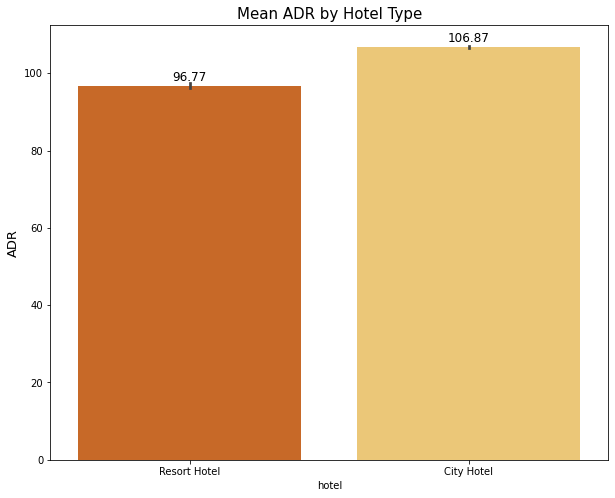

In [52]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x = 'hotel', y='adr', palette='YlOrBr_r', data=df)
plt.title("Mean ADR by Hotel Type", fontsize=15)
plt.ylabel('ADR',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [53]:
print("jumlah negara :",df['country'].nunique())

jumlah negara : 177


In [54]:
df_country=pd.crosstab(index=[df['country']],columns='jumlah').sort_values('jumlah',ascending=False).head(11)
df_country=df_country.reset_index()
# df_country

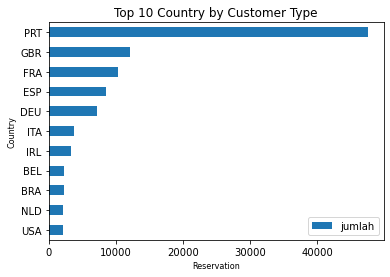

In [55]:
# plt.figure(figsize=(12,8))

ax=df_country.plot(x='country',y='jumlah',kind="barh")
ax.invert_yaxis()
plt.title("Top 10 Country by Customer Type",fontsize=12)
plt.xlabel('Reservation',fontsize=8)
plt.ylabel('Country',fontsize=8)

plt.show()

 - Dari 177 negara, 40% reservasi berasal dari Customer Negara Portugal.
 - 10 Negara teratas adalah Negara yang banyak terdapat di benua eropa, yaitu wilayah Eropa Selatan dan Eropa Barat, Seperti Portugal(PRT), United kingdom(GBR), France(FRA), Spanyol(ESP), Germany(DEU), Italy(ITA), Irlandia(IRL), Belgia(BEL), Netherlands(NLD), kecuali Brazil berasal dari Amerika Selatan.
 
     - Eropa Selatan : Portugal, Italy, Spanyol 
     - Eropa Barat : UK, France, Germany, Irlandia, Belgia, Netherlands.
     - Amerika Selatan: Brazil
 - Reservasi yang berasal dari Top 10 country, didominasi oleh customer type transient dan transient-party
 

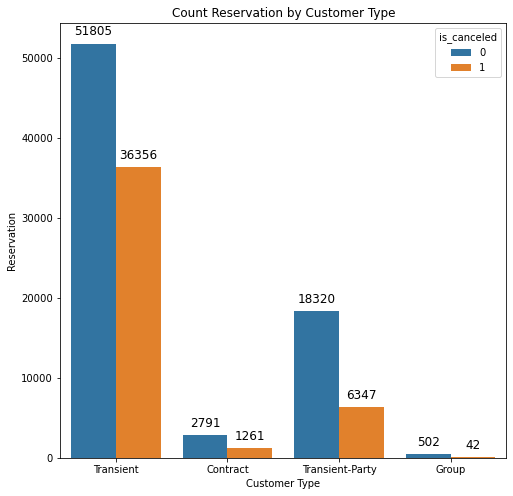

Tipe tamu Transient(tipe tamu yang menginap sangat singkat, hanya satu hari satu malam) adalah yang paling banyak reservasi di city hotel atau resort hotel sebesar 75.08 persen.


In [56]:
# grafik jumlah tipe customer
plt.figure(figsize=(8,8))
ax=sns.countplot(x='customer_type',data=df,hue='is_canceled')
plt.xlabel('Customer Type')
plt.ylabel('Reservation')
plt.title('Count Reservation by Customer Type')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+500), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
x=round((88162)/117427*100,2)
print("Tipe tamu Transient(tipe tamu yang menginap sangat singkat, hanya satu hari satu malam) adalah yang paling banyak reservasi di city hotel atau resort hotel sebesar",x,"persen.")

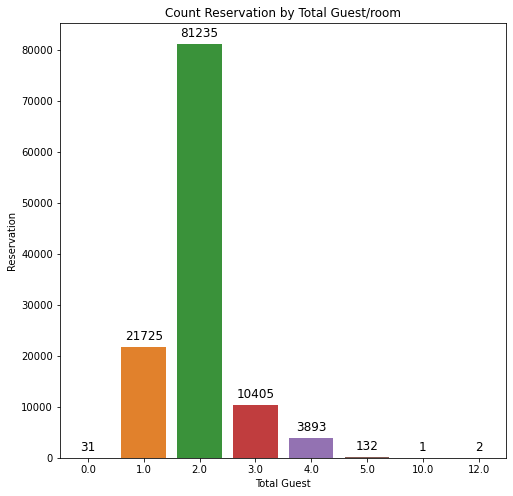

69.18 Persen reservasi dilakukan oleh tamu yang berjumlah 2 orang


In [57]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='total_cust',data=df)
plt.xlabel('Total Guest')
plt.ylabel('Reservation')
plt.title('Count Reservation by Total Guest/room')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+500), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
x=round((81237)/117427*100,2)
print(x,"Persen reservasi dilakukan oleh tamu yang berjumlah 2 orang")

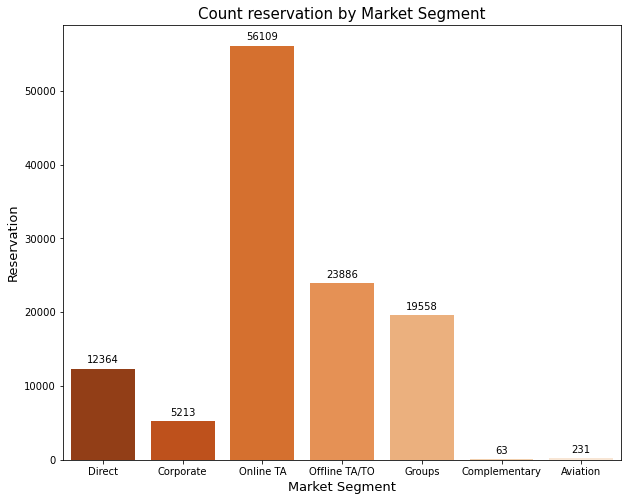

47.78 persen orang melakukan reservasi melalui Online Travel Agent 20.34 persen orang melalukan reservasi melalui offline travel agent, dan sisanya melakukan pemesanan langsung tanpa travel agent


In [58]:
plt.figure(figsize=(10,8))
sp=sns.countplot(df['market_segment'], palette = 'Oranges_r')
plt.title("Count reservation by Market Segment", fontsize=15)
plt.ylabel('Reservation',fontsize=13)
plt.xlabel('Market Segment',fontsize=13)
for p in sp.patches:
    sp.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
x=round((56110)/117427*100,2)
y=round((23886)/117427*100,2)
print(x,"persen orang melakukan reservasi melalui Online Travel Agent",y,"persen orang melalukan reservasi melalui offline travel agent, dan sisanya melakukan pemesanan langsung tanpa travel agent")

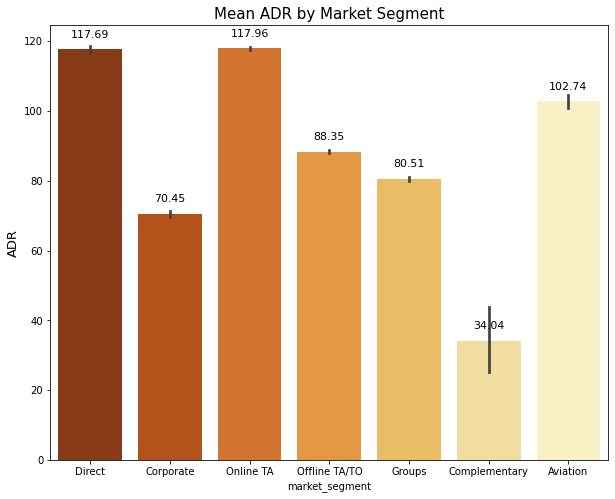

In [59]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x = 'market_segment', y='adr', palette='YlOrBr_r', data=df)
plt.title("Mean ADR by Market Segment", fontsize=15)
plt.ylabel('ADR',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+2), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [60]:
df_month = df.groupby(['arrival_date_month']).agg({'total_cust':'sum','arrival_date_year':'nunique'}).reset_index()
df_month['mean_cust'] = round(df_month['total_cust'] / df_month['arrival_date_year'])
# df_month

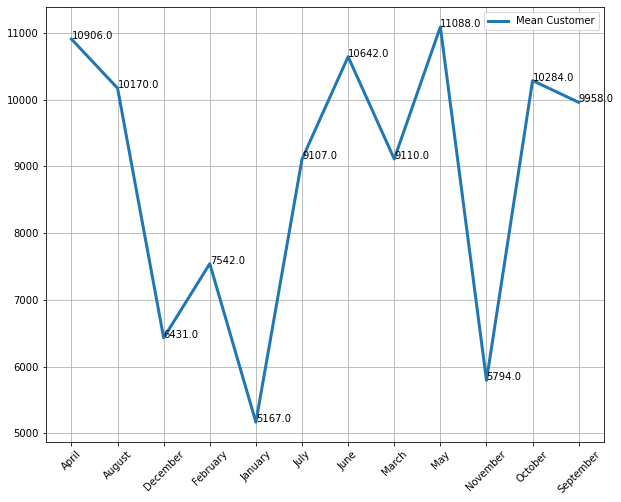

In [61]:
plt.figure(figsize=(10,8))
plt.plot(df_month["arrival_date_month"],df_month["mean_cust"],label='Mean Customer', linewidth=3)
plt.legend()
plt.grid(True)
for i in df_month["mean_cust"]:
    ind = list(df_month["mean_cust"]).index(i)
    plt.text(df_month["arrival_date_month"][ind], i+2, i)

plt.xticks(rotation = 45)
plt.show()

In [62]:
df.groupby(['assigned_room_type']).agg({'total_cust':'median', 'adr':'median'}).reset_index()

,assigned_room_type,total_cust,adr
0,A,2.0,90.000
1,B,2.0,91.850
2,C,2.0,95.000
3,D,2.0,105.500
4,E,2.0,108.000
5,F,2.0,162.450
6,G,4.0,166.890
7,H,4.0,166.165
8,I,2.0,70.200
9,K,2.0,98.700


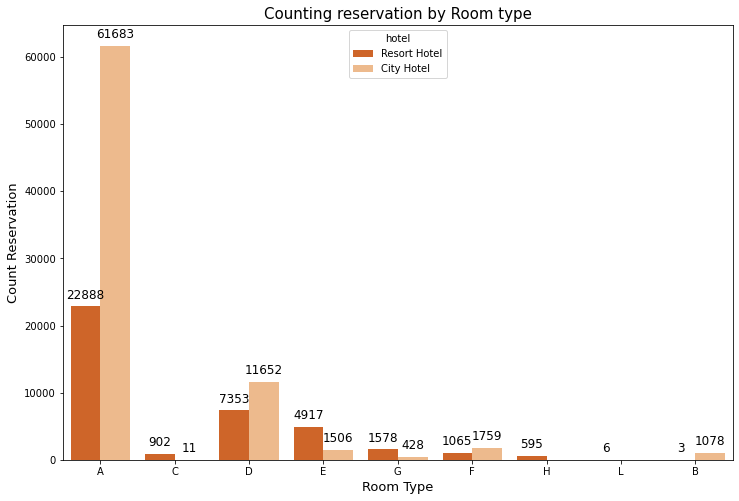

Tipe Kamar A paling diminati di hotel ini. 52.53 persen orang memesan kamar tipe A di City Hotel dan 19.49 persen orang memesan tipe kamar A di Resort Hotel. 
12.01 persen tamu tidak mendapatkan kamar yang sesuai dengan kamar saat reservasi


In [63]:
tidaksesuai=df[df['reserved_room_type']!=df['assigned_room_type']]
ts=round(len(tidaksesuai)/len(df)*100,2)

plt.figure(figsize=(12,8))
pt=sns.countplot(df['reserved_room_type'], palette = 'Oranges_r',hue=df['hotel'])
plt.title("Counting reservation by Room type", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Room Type',fontsize=13)
for bar in pt.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    pt.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+500), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.show()
x=round((61683)/117427*100,2)
y=round((22889)/117427*100,2)
print("Tipe Kamar A paling diminati di hotel ini.",x,"persen orang memesan kamar tipe A di City Hotel dan",y,'persen orang memesan tipe kamar A di Resort Hotel. ')
print(ts,"persen tamu tidak mendapatkan kamar yang sesuai dengan kamar saat reservasi")

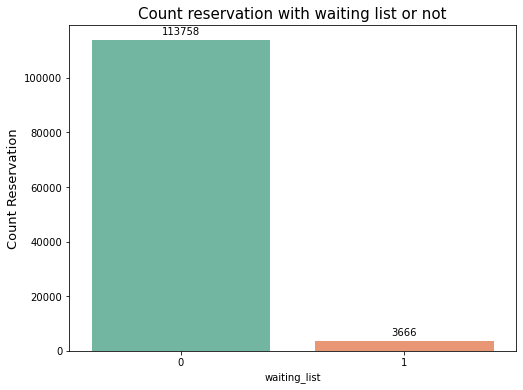

3.12 persen pemesanan harus menunggu (waiting_list) sebelum proses reservasi dikonfirmasi


In [64]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='waiting_list', data=df,palette='Set2')
plt.title("Count reservation with waiting list or not", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

x=round((3666)/117427*100,2)
print(x,"persen pemesanan harus menunggu (waiting_list) sebelum proses reservasi dikonfirmasi")

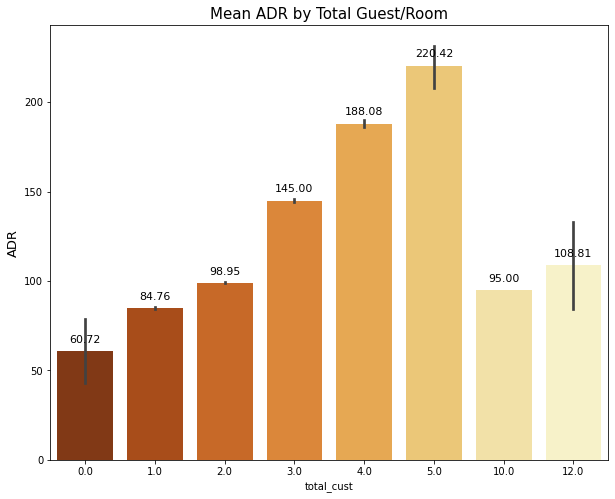

In [65]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x = 'total_cust', y='adr', palette='YlOrBr_r', data=df)
plt.title("Mean ADR by Total Guest/Room", fontsize=15)
plt.ylabel('ADR',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+2), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

# 2. Bagaimana karakteristik customer yang berpotensi melakukan cancellation?

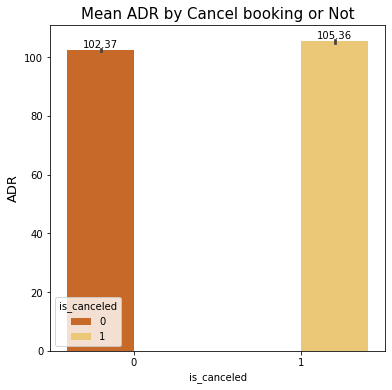

In [66]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x = 'is_canceled', y='adr', palette='YlOrBr_r', data=df, hue='is_canceled')
plt.title("Mean ADR by Cancel booking or Not", fontsize=15)
plt.ylabel('ADR',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.show()

- Walaupun terdapat perbedaan yang cukup tipis, ADR yang lebih mahal mempengaruhi keputusan customer untuk membatalkan reservasi.

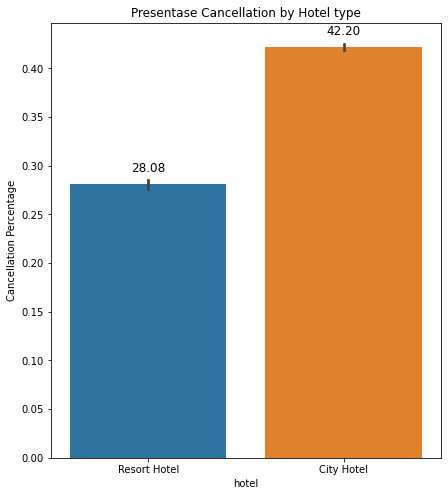

Persentase Cancel di City Hotel lebih banyak dibanding Resort Hotel


In [67]:
plt.figure(figsize=(7,8))
ax=sns.barplot(x=df['hotel'], y=df['is_canceled'])
plt.ylabel('Cancellation Percentage')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()*100, '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Presentase Cancellation by Hotel type')
plt.show()
print('Persentase Cancel di City Hotel lebih banyak dibanding Resort Hotel')

In [68]:
df_top10=df[(df['country']=='PRT')|(df['country']=='GBR')|(df['country']=='FRA')|(df['country']=='ESP')|(df['country']=='DEU')|(df['country']=='IRL')|(df['country']=='ITA')|(df['country']=='BEL')|(df['country']=='NLD')|(df['country']=='USA')|(df['country']=='BRA')]

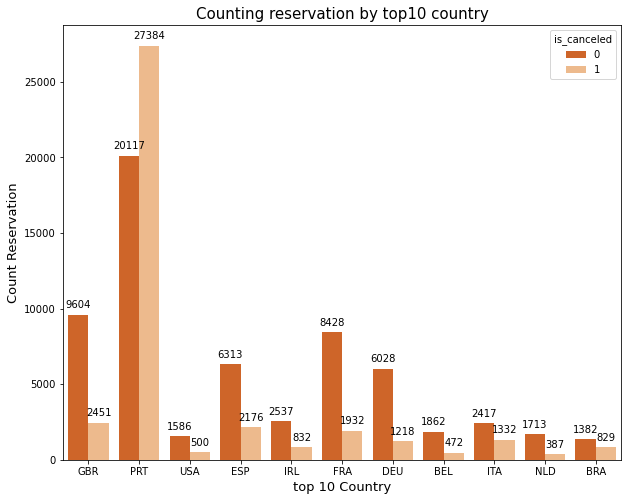

In [69]:
plt.figure(figsize=(10,8))
sp=sns.countplot(df_top10['country'], palette = 'Oranges_r',hue=df_top10['is_canceled'])
plt.title("Counting reservation by top10 country", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('top 10 Country',fontsize=13)
for p in sp.patches:
    sp.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

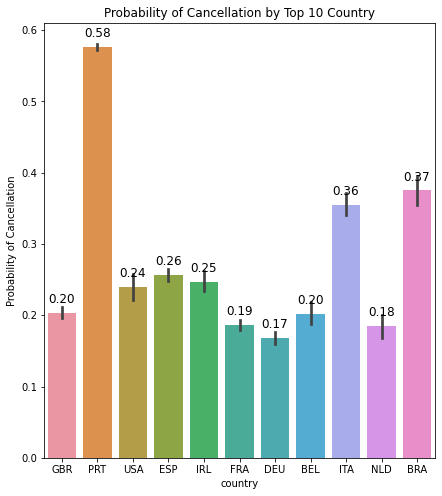

In [70]:
plt.figure(figsize=(7,8))
ax=sns.barplot(x=df_top10['country'], y=df_top10['is_canceled'])
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation by Top 10 Country')
plt.show()

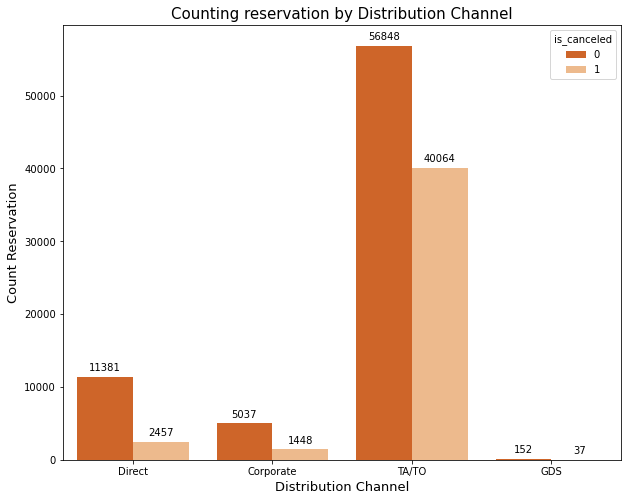

In [71]:
plt.figure(figsize=(10,8))
sp=sns.countplot(df['distribution_channel'], palette = 'Oranges_r',hue=df['is_canceled'])
plt.title("Counting reservation by Distribution Channel", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Distribution Channel',fontsize=13)
for p in sp.patches:
    sp.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

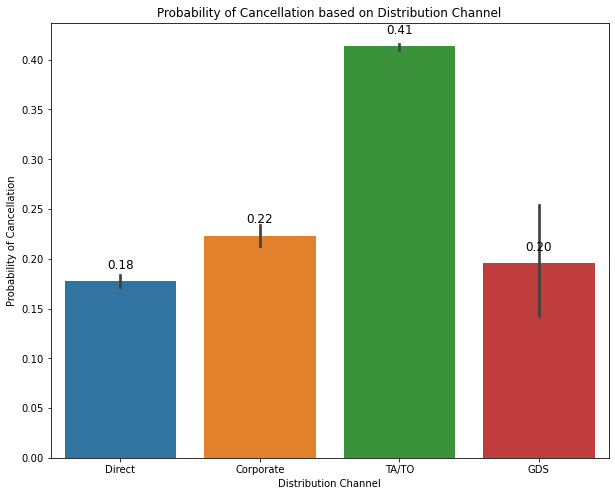

Probability cancel paling tinggi adalah reservasi melalui Travel Agent


In [72]:
# grafik presentase banyaknya cancel yg dilakukan tiap tipe customer

plt.figure(figsize=(10,8))
ax=sns.barplot(x=df['distribution_channel'], y=df['is_canceled'])
plt.xlabel('Distribution Channel')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Distribution Channel')
plt.show()

print("Probability cancel paling tinggi adalah reservasi melalui Travel Agent")
# pie chart

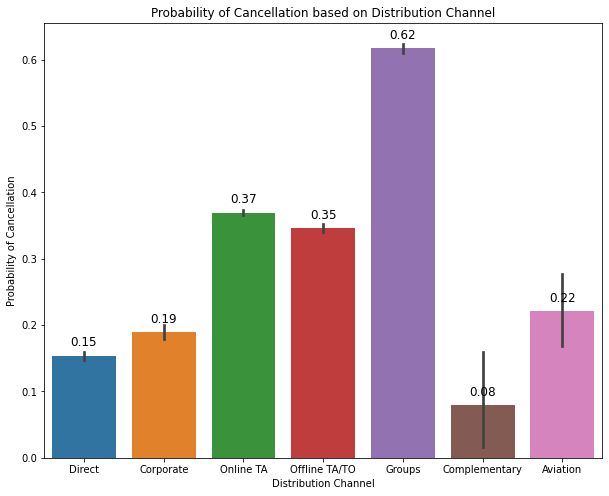

Probability cancel paling tinggi adalah reservasi melalui Travel Agent


In [73]:
# grafik presentase banyaknya cancel yg dilakukan tiap tipe customer

plt.figure(figsize=(10,8))
ax=sns.barplot(x=df['market_segment'], y=df['is_canceled'])
plt.xlabel('Distribution Channel')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Distribution Channel')
plt.show()

print("Probability cancel paling tinggi adalah reservasi melalui Travel Agent")

#### insight
- Peluang cancellation paling banyak dilakukan oleh customer yang melakukan booking melalui Online/offline TA 

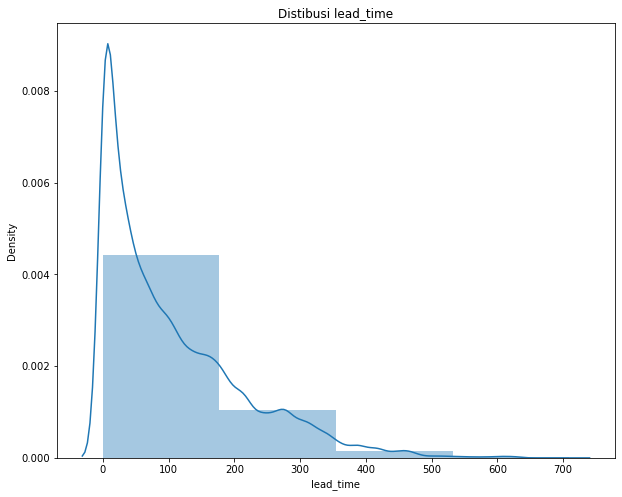

In [74]:
plt.figure(figsize=(10,8))
sns.distplot(df['lead_time'],bins=4)
plt.title('Distibusi lead_time')
plt.show()

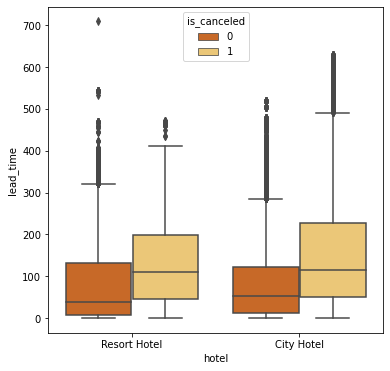

In [75]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'hotel', y='lead_time', palette='YlOrBr_r', data=df,hue='is_canceled')
plt.show()
#gaperlu

In [76]:
q1 = df['lead_time'].describe()['25%']
q3 = df['lead_time'].describe()['75%']
q2 = df['lead_time'].describe()['50%']

df['lead_time_class'] = df['lead_time'].apply(
    lambda x: 'IV' if x >= q3 else ('III' if x >= q2 and x < q3 else('II' if x >=q1 and x <q2 else 'I')) 
)

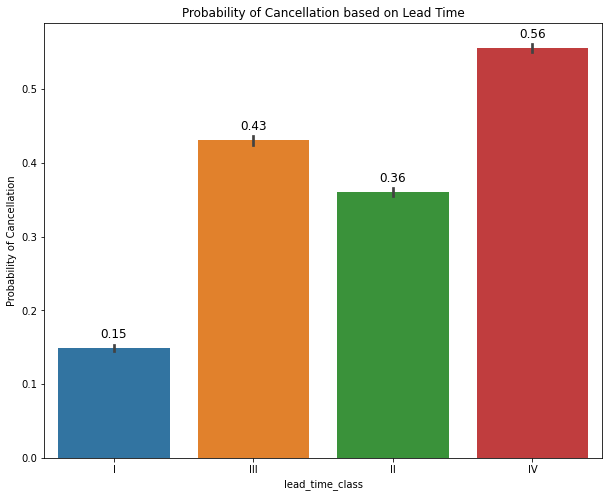

In [77]:
# grafik presentase banyaknya cancel yg dilakukan tiap tipe customer

plt.figure(figsize=(10,8))
ax=sns.barplot(x=df['lead_time_class'], y=df['is_canceled'])
plt.xlabel('lead_time_class')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Lead Time')
plt.show()

#### insight
- semakin besar lead time semakin besar peluang customer melakukan cancellation

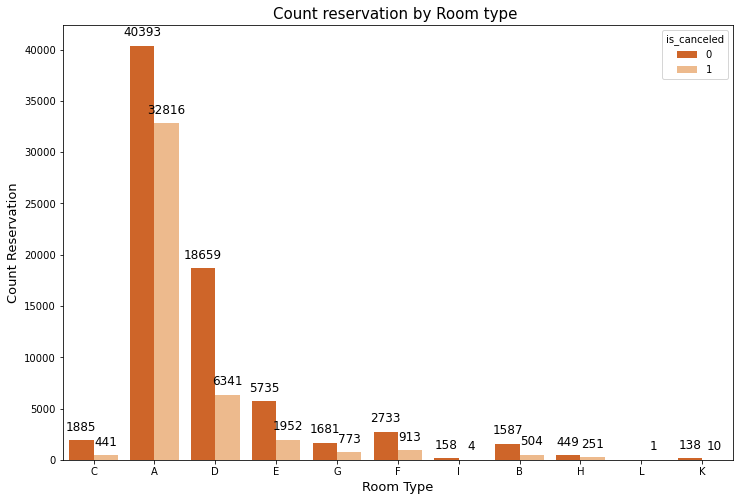

In [78]:
plt.figure(figsize=(12,8))
pt=sns.countplot(df['assigned_room_type'], palette = 'Oranges_r',hue=df['is_canceled'])
plt.title("Count reservation by Room type ", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Room Type',fontsize=13)
for bar in pt.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    pt.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+500), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

#### insight
- customer yang memesan room type A paling banyak melakukan cancellation
- cancellation room type A merupakan yang terbanyak di kedua tipe hotel, baik city maupun resort

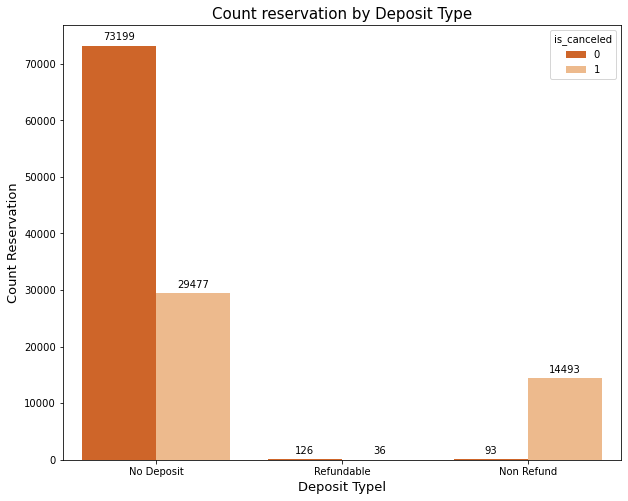

In [79]:
plt.figure(figsize=(10,8))
sp=sns.countplot(df['deposit_type'], palette = 'Oranges_r',hue=df['is_canceled'])
plt.title("Count reservation by Deposit Type", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Deposit Typel',fontsize=13)
for p in sp.patches:
    sp.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

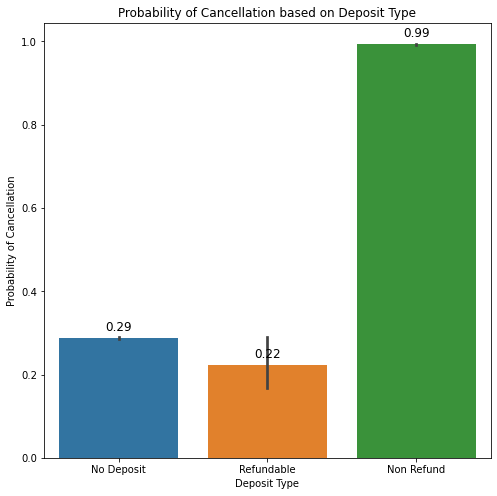

In [80]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x=df['deposit_type'], y=df['is_canceled'])
plt.xlabel('Deposit Type')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Deposit Type')
plt.show()

In [81]:
## coba tengon non refund

#### insight
- customer yang melakukan booking tanpa deposit paling banyak melakukan cancellation

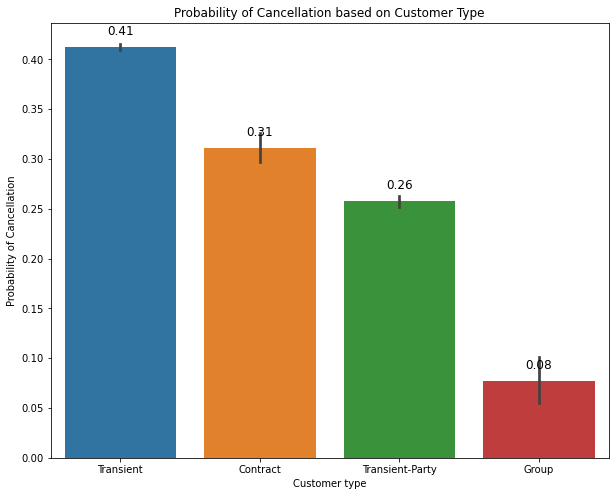

Persentase cancel paling tinggi adalah tipe customer transient sebesar 41.24%


In [82]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=df['customer_type'], y=df['is_canceled'])
plt.xlabel('Customer type')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Customer Type')
plt.show()

print("Persentase cancel paling tinggi adalah tipe customer transient sebesar 41.24%")

#### insight
- Tipe customer Transient memiliki jumlah cancellation paling banyak
- berdasarkan persentase customer tipe Transient juga memiliki persentase paling besar dalam melakukan cancellation

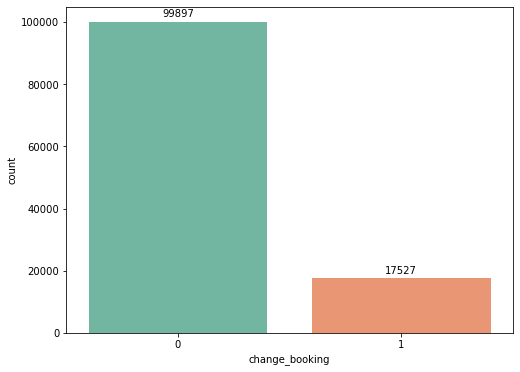

14.93 persen customer pernah melakukan perubahan tanggal reservasi


In [83]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='change_booking', data=df, palette='Set2')
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()
x=round((17527)/117427*100,2)
print(x,"persen customer pernah melakukan perubahan tanggal reservasi")

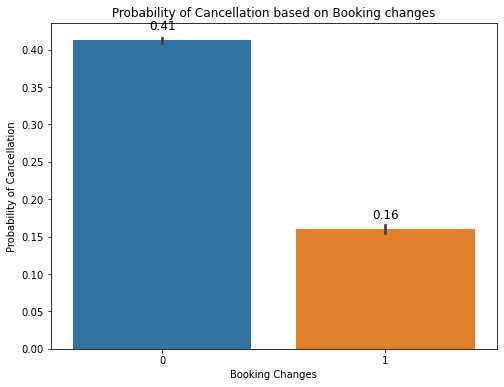

In [84]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=df['change_booking'], y=df['is_canceled']==1)
plt.xlabel('Booking Changes')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Probability of Cancellation based on Booking changes');

#### Insight
- cancellation paling banyak dilakukan oleh customer yang tidak melakukan booking changes
- berdasarkan presentase juga menunjukan customer yang melakukan booking changes lebih sedikit melakukan cancel
- Customer yang pernah melakukan perubahan tanggal booking memiliki persentase cancel lebih rendah dibanding yang tidak pernah melakukan perubahan

#### Semakin lama days_in_waiting_list semakin berpotensi untuk cancel.

In [85]:
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,  11, 142,   2,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36], dtype=int64)

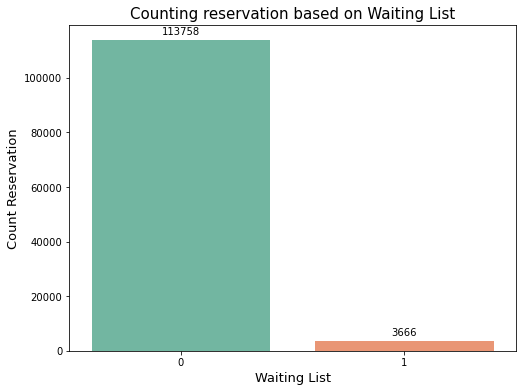

In [86]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='waiting_list', data=df, palette='Set2')
plt.title("Counting reservation based on Waiting List", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Waiting List',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()


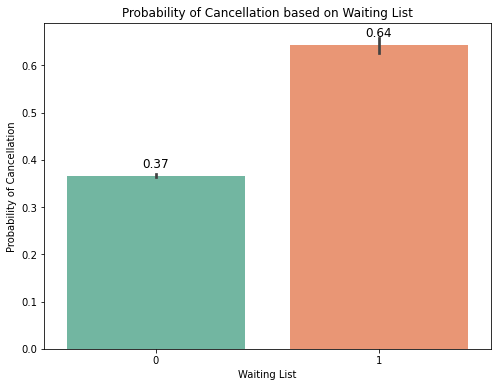

In [87]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['waiting_list'], y=df['is_canceled'],palette='Set2')
plt.xlabel('Waiting List')
plt.ylabel('Probability of Cancellation')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+0.009), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Probability of Cancellation based on Waiting List')
plt.show()

#### insight
- jumlah customer yang tidak waiting list lebih banyak sehingga secara jumlah, customer yang melakukan cancellation lebih banyak
- secara persentase, customer yang waiting list lebih banyak melakukan cancellation

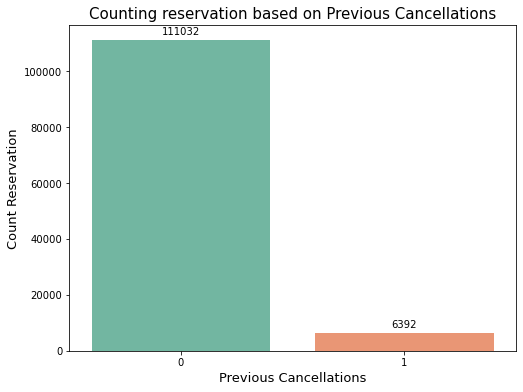

In [88]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='pre_cancellations', data=df, palette='Set2')
plt.title("Counting reservation based on Previous Cancellations", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Previous Cancellations',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()


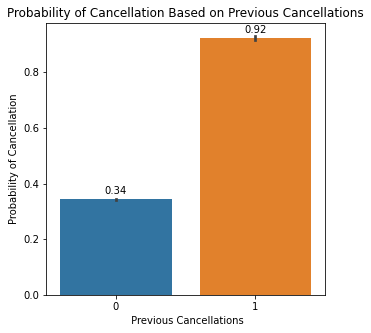

92% customer yang pernah melakukan cancel booking sebelumnya melakukan cancel kembali direservasi sekarang


In [89]:
# grafik presentase banyaknya cancel yg dilakukan berdasarkan Previous Cancellations

plt.figure(figsize=(5,5))
ax=sns.barplot(x=df['pre_cancellations'], y=df['is_canceled'])
plt.xlabel(' Previous Cancellations')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Probability of Cancellation Based on Previous Cancellations')
plt.show()
print('92% customer yang pernah melakukan cancel booking sebelumnya melakukan cancel kembali direservasi sekarang')

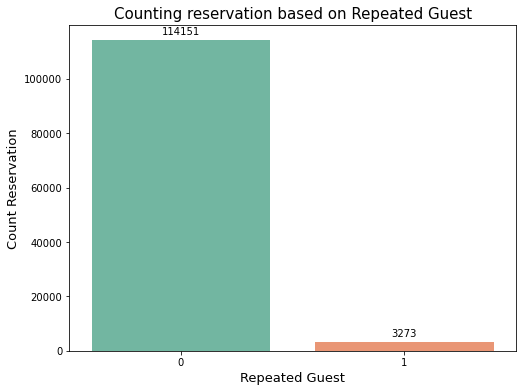

2.79 persen reservasi berasal dari customer yang pernah melakukan reservasi sebelumnya


In [90]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='is_repeated_guest', data=df,palette='Set2')
plt.title("Counting reservation based on Repeated Guest", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)
plt.xlabel('Repeated Guest',fontsize=13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()


x=round((3273)/117427*100,2)
print(x,"persen reservasi berasal dari customer yang pernah melakukan reservasi sebelumnya")

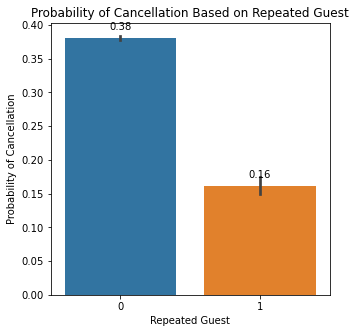

In [91]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x=df['is_repeated_guest'], y=df['is_canceled'])
plt.xlabel('Repeated Guest')
plt.ylabel('Probability of Cancellation')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()+0.008), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Probability of Cancellation Based on Repeated Guest')
plt.show()

#### insight
- customer yang pernah melakukan booking sebelumnya memiliki presentase cancellation yang lebih kecil

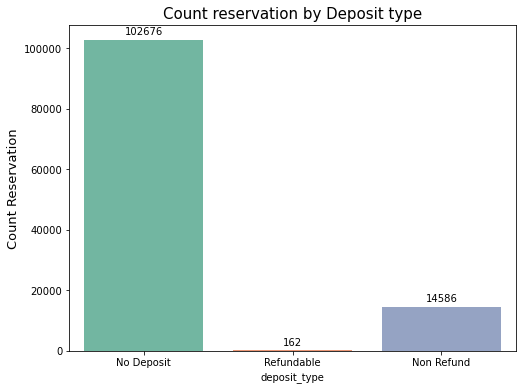

87.44 persen reservasi tidak meninggalkan deposit saat melakukan pemesanan


In [92]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='deposit_type', data=df, palette='Set2')
plt.title("Count reservation by Deposit type", fontsize=15)
plt.ylabel('Count Reservation',fontsize=13)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()+100), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()
x=round((102679)/117427*100,2)
print(x,"persen reservasi tidak meninggalkan deposit saat melakukan pemesanan")

-------------------------------------------------------------------------------------------------------------------------------

# Kesimpulan

## 1. Bagaimana Laporan Hasil Penjualan Kamar 2015-2017?

- Dari 2015-2017 ada 117427 reservasi kamar hotel yang 57% dari seluruh reservasi dilakukan pada hari weekend. Jumlah reservasi yang paling banyak yang pernah terjadi yaitu pada quartal-2 tahun 2017.  Seperti hal pemesanan pada umumnya, 37,5% dari reservasi kamar hotel  dicancel oleh customer, bisa dengan pemberitahuan ataupun tidak dari pihak customer.

- Dari total seluruh booking kamar yang dicancel, 2,7% di anataranya berstatus tidak ada kabar/no show sedangkan sisanya benar-benar dicancel

- Terdapat 2 jenis hotel yaitu Resort Hotel dan City Hotel, di mana City Hotel lebih diminati oleh customer dengan dengan perbedaan sebesar 33.05 persen. 

- Customer yang berasal dari Portugal mendominasi reservasi booking sebesar 40%, salah satu alasan kenapa di bulan may (kuartil 2) rame karena di periode itu baru berakhirnya musim dingin jadi tumbuhan di portugal mulai mekar lagi dan masuk musim spring selain itu ada acara fatima pilgrimage kaya semacam acara ziarah paling gede di portugal (11-13 may) 

- 47.78 persen customer melakukan reservasi melalui Online Travel Agent, 20.34%  customer melalukan reservasi melalui offline travel agent, dan sisanya melakukan  pemesanan langsung tanpa travel agent

- 69% dari reservasi kamar hotel untuk 2 orang tamu. Tamu sendiri ada beberapa jenis yaitu: Transient, Contract, Transient-Party, dan Group. Dari jenis tamu tersebut, Transient merupakan jenis tamu yang paling sering booking kamar dengan persentase 75% dari seluruh reservasi dan rata-rata adr tertinggi di antara seluruh tipe dengan nilai 108.71 euro.

## 2. BAGAIMANA KARKATERISTIK CANCELLATION BOOKING?

- booking made through online travel agent booking hotel paling banyak dilakukan melalui Travel Agent, sehingga cancellation paling banyak juga dilakukan oleh customer yang melakukan booking melalui TRavel agent. berdasarkan market segment, cancellation paling banyak terjadi pada Travel Agent dengan market segment Online dengan presentase sebesar 46.96%

- berdasarkan 10 negara dengan total customer terbanyak, customer yang berasal dari portugal memiliki persertase cancellatations terbesar yaitu 58%, sementara jerman memiliki persentase paling rendah sebesar 17% 

- high lead time : lead time berbanding lurus dengan cancellation, semakin tinggi lead time, semakin besar jumlah cancellation

- Room type A merupakan jenis kamar yang paling banyak mengalami cancellation pada kedua tipe hotel dengan total presentase cancellation sebesar 28%, baik tipe hotel city maupun tipe hotel resort, sedangkan Room type yang paling sedikit mengalami cancellation adalah room type L dengan presentase sebesar 0,01% 

- no deposit : berdasarkan jumlhannya, tipe deposit no deposit memiliki jumlah cancel paling banyak, tetapi berdasarkan presentaasenya tipe deposit non refundable memiliki presentase cancellation paling besar sebesar 99%, sementara tipe deposit refundable merupakan yg paling kecil dengan presentase sebesar 22%

- transient type customer : berdasarkan tipenya, customer yang paling banyak melakukan cancellation adalah tipe customer Transient dan berdasarkan presentasenya, sekitar 41% customer pada tipe Transient melakukan cancellation dan ini juga merupakan angka presentase cancellation terbesar, sedangkan tipe customer dengan cancellation terendah yaitu tipe group dengan presentase sebesar 8%

- no booking changes : customer yang tidak melakukan perubahan pada bookingnya atau no booking changes lebih banyak melakukan cancellation, dengan total presentase 41% yang melakukan cancellation dari keseluruhan customer yang tidak melakukan booking changes

- waiting list : berdasarkan jumlahnya, cancellation paling banyak dilakukan oleh customer yang tidak terkena waiting list, namun secara presentase, customer yang terkena waiting list lebih banyak melakukan cancellation sebesar 64% dari total customer yang mengalami waiting list dibandingkan dengan customer yang tidak mengalami waiting list yang hanya sebesar 36% dari totalnya

- previous cancellation :  92% dari customer yang sebelumnya pernah melakukan cancellation sebelumnya, melakukan cancellation lagi di booking selanjutnya

- new customer : jumlah customer yang melakukan cancellation lebih banyak terjadi pada customer baru, dengan presentase sebesar 38%

## Rekomendasi 

### Rekomendasi 1:
- Dari hasil eksplorasi data booking hotel dari tahun 2015-2017, kita mendapatkan fakta bahwa total 37% dari booking tersebut dicancel oleh customers, sehingga hotel kehilangan banyak potensi revenue. Oleh karena itu kita buat suatu model yang dapat memprediksi apakah pesanan kamar hotel oleh customer akan dicancel atau tidak. Sehingga dengan model tersebut kita dapat mengatur besaran budget untuk palnning-planning yang akan dilakukan oleh tim Marketing dalam memasarkan kamar hotel.

- Selanjutnya, dari model prediksi itu kita dapat mengetahui perkiraan jumlah berapa pesanan yang akan dicancel, dari situ kita bisa memberikan treatment agar customer tidak jadi cancle dan kita dapat memaksimalkan revenue.
- Treatmentnya dapat berupa:
    1. Notifikasi sisa hari menuju tanggal booking
    2. Cancel Policies (refrensi: shorturl.at/stvDQ)

### Rekomendasi 2:
- Kita dapat melihat trend penjualan kamar hotel akan meningkat dari akhir bulan Q1 hingga akhir bulan pada Q2 di tiap tahunnya, hal ini bisa disebabkan karena kondisi peralihan cuaca dari musim dingin ke musim semi atau pada bulan mei umat katolik melangsungkan kegiatan Pilgrimage to Fatima. Sehingga kita dapat melakukan adjusting rate kamar hotel agar dapat memaksimalkan revenue.

### Rekomendasi 3:
- Kita sudah mengeksplorasi data pesanan hotel dan kita mengetahui data mengenai apakah seorang customer tersebut sebelumnya pernah mengcancel booking atau tidak. 92% dari customer yang sebelumnya pernah melakukan cancellation sebelumnya, melakukan cancellation lagi di booking selanjutnya. Oleh karena itu, kita mungkin dapat melakukan evaluasi dengan pemberian borang/angket/feedback secara online maupun offline agar pihak hotel dapat meningkatkan kualitas pelayanan sehingga diharapkan jumlah customer yang akan mengcancel booking akan berkurang.

### Rekomendasi 4:
- Kita dapat mengetahui bahwa masih banyak customers yang memesan hotel tanpa jaminan pesanan (Deposit), hal itu dapat merugikan pihak hotel jika ada customer yang sudah memesan kamar hotel tanpa jaminan lalu membatalkan pesanan kamar~~

## Simulasi

Setelah mengembangkan model yang dapat memprediksi apakah suatu pesanan akan dibatalkan atau tidak, 
kita coba untuk menguji model tersebut apakah dapat menyelesaikan permasalahan yang ada pada bisnis hotel ini. 
Permasalahan yang diangkat ialah:
1. Budget Planning
2. Memaksimalkan Revenue

Untuk Budget Planning:
    Kita asumsikan pada bulan selanjutnya kita sudah mempunyai data-data pesanan kamar hotel yang berjumlah 2000 dan rata-rata 
harga pesanan kamar sebesar 100. Dimisalkan Tim Marketing Hotel menghabiskan dana untuk planing marketing mereka dengan tanpa
mengetahui seberapa pesanan yang akan dibatalkan yaitu sebesar 200.000, maka kemungkinan besar revenue yang akan mereka dapatkan kurang maksimal karena
tidak sesuainya pengeluaran budget untuk marketing plan dengan jumlah aktual pesanan pada bulan tersebut.
    Selanjutnya, jika kita gunakan model yang sudah dibuat untuk memprediksi pesanan pada bulan tersebut, maka kita 
dapatkan 30% dari total pesanan(600) akan berpotensi dibatalkan oleh customers dengan tingkat akurasi prediksi sebesar 89%. 
Sehingga kemungkinan pesanan yang akan terjadi sebesar 1400 pesanan kamar hotel. Maka dari itu tim manajemen dapat menghitung 
minmal budget planning sebesar 140.000 dan kita dapat menghemat kurang lebih 60.000 jika dibandingkan dengan minmal budget
awal ketika tidak dilakukan prediksi.

   Selanjutnya untuk memaksimalkan revenue, setelah diprediksi jumlah pesanan kamar yang akan dibatalkan, kita coba untuk 
memberikan perhatian lebih agar yang semulanya diprediksi membatalkan pesanan dapat berubah pikiran. Jika dilihat contoh 
sebelumnya, misalkan dari 2000 pesanan kamar hotel itu kita tidak prediksi berapa jumlah yang akan membatalkan pesanan, maka
kita akan kehilangan potensi revenue maksimal. Sedangkan jika kita mengetahui jumlah pesanan yang akan dibatalkan dengan model
yang telah dikembangkan, misal 30% (600) pesanan ternyata berpotensi dibatalkan, maka kita dapat melakukan pendenkatan dengan
memberikan treatment sesuai rekomendasi sebelumnya. Lalu dengan kita melakukan treatment lebih kepada yang berpotensi membatalkan pesanan, kita medapatkan hasil 50% dari pesanan yang berpotensi tadi tidak jadi membatalkan pesanan. Maka kita dapat memaksimalkan jumlah revenue kita.